# Solving MDP

In [ ]:
import numpy as np
from enum import IntEnum
from itertools import product

In [2]:
num_spaces = 12
p_min = 0.1
p_max = 0.9
p_same = 0.9
t_drive = 1
t_walk = 3
t_wait = 10
r_no = 100

Q = np.zeros((num_spaces, 2, 3))
V = np.zeros((num_spaces, 2))

p = np.linspace(p_min, p_max, num_spaces)


class Action(IntEnum):
    WAIT = 0
    PARK = 1
    NEXT = 2


class Status(IntEnum):
    EMPTY = 0
    FULL = 1


def reward(state, action):
    space, status = state
    if action == Action.WAIT:
        return -t_wait
    elif action == Action.PARK:
        if status == Status.EMPTY:
            return -t_walk * (num_spaces - space - 1)
        elif status == Status.FULL:
            return -r_no
    elif action == Action.NEXT:
        if space == num_spaces - 1:
            return -r_no
        else:
            return -t_drive


def value_iteration(v, q):
    delta = 1
    threshold = 1e-6
    max_iters = 100
    iters = 0
    while delta > threshold and iters < max_iters:
        last_v = np.copy(v)
        for space, status, action in product(range(num_spaces), Status, Action):
            def same_status(status):
                return p_same * (reward((space, status), action) + v[space, status])

            def diff_status(old, new):
                return (1 - p_same) * (reward((space, old), action) + v[space, new])

            if status == Status.EMPTY and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.FULL)

            if status == Status.FULL and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.EMPTY)

            def terminal(status, action):
                return reward((space, status), action)

            if status == Status.EMPTY and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            def same_next_status(status):
                return reward((space, status), action) + v[space + 1, status]

            def diff_next_status(old, new):
                return reward((space, old), action) + v[space + 1, new]

            if status == Status.EMPTY and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = (1 - p[space + 1]) * same_next_status(status) + p[space + 1] * diff_next_status(status, Status.FULL)
                else:
                    q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = p[space + 1] * same_next_status(status) + (1 - p[space + 1]) * diff_next_status(status, Status.EMPTY)
                else:
                    q[space, status, action] = terminal(status, action)

        v = np.max(q, axis=-1)

        delta = np.max(np.abs(v - last_v))
        iters += 1

    return v, q


new_v, new_q = value_iteration(V, Q)


def policy(q):
    return np.argmax(q, axis=-1)

In [3]:
print(new_v, new_q)

[[-25.61859035 -25.61859035]
 [-24.61860954 -24.61860954]
 [-23.61862682 -23.61862682]
 [-22.61864237 -22.61864237]
 [-21.         -22.58260931]
 [-18.         -25.72726603]
 [-15.         -33.13569735]
 [-12.         -45.05877988]
 [ -9.         -60.41977127]
 [ -6.         -76.7975585 ]
 [ -3.         -90.99734386]
 [  0.         -99.99734386]] [[[ -35.61856902  -33.          -25.61859035]
  [ -35.61856902 -100.          -25.61859035]]

 [[ -34.61859035  -30.          -24.61860954]
  [ -34.61859035 -100.          -24.61860954]]

 [[ -33.61860954  -27.          -23.61862682]
  [ -33.61860954 -100.          -23.61862682]]

 [[ -32.61862682  -24.          -22.61864237]
  [ -32.61862682 -100.          -22.61864237]]

 [[ -31.15825735  -21.          -22.58260931]
  [ -32.42431616 -100.          -22.58260931]]

 [[ -28.77271965  -18.          -25.72726603]
  [ -34.95447689 -100.          -25.72726603]]

 [[ -26.81355807  -15.          -33.13569735]
  [ -41.32202267 -100.          -33.13569

In [4]:
pi = policy(new_q)
for space in range(1, num_spaces+1):
    print(f'At space {space}')
    print(f'    If space is full:', Action(pi[space-1, Status.FULL]))
    print(f'    If space is empty:', Action(pi[space-1, Status.EMPTY]))

At space 1
    If space is full: Action.NEXT
    If space is empty: Action.NEXT
At space 2
    If space is full: Action.NEXT
    If space is empty: Action.NEXT
At space 3
    If space is full: Action.NEXT
    If space is empty: Action.NEXT
At space 4
    If space is full: Action.NEXT
    If space is empty: Action.NEXT
At space 5
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 6
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 7
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 8
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 9
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 10
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 11
    If space is full: Action.NEXT
    If space is empty: Action.PARK
At space 12
    If space is full: Action.WAIT
    If space is empty: Action.PARK


# Value Iteration Timings

In [5]:
p_min = 0.1
p_max = 0.9
p_same = 0.9
t_drive = 1
t_walk = 3
t_wait = 10
r_no = 100
r_crash = 100

Q = np.zeros((num_spaces, 2, 3))
V = np.zeros((num_spaces, 2))

p = np.linspace(p_min, p_max, num_spaces)

class Action(IntEnum):
    WAIT = 0
    PARK = 1
    NEXT = 2


class Status(IntEnum):
    EMPTY = 0
    FULL = 1


def reward_decorator(num_spaces):
    def reward_with_spaces(state, action):
        space, status = state
        if action == Action.WAIT:
            return -t_wait
        elif action == Action.PARK:
            if status == Status.EMPTY:
                return -t_walk * (num_spaces - space - 1)
            elif status == Status.FULL:
                return -r_crash
        elif action == Action.NEXT:
            if space == num_spaces - 1:
                return -r_no
            else:
                return -t_drive
    return reward_with_spaces


def value_iteration(v, q, p, num_spaces):
    reward = reward_decorator(num_spaces)
    delta = 1
    threshold = 1e-6
    max_iters = 1000
    iters = 0
    while delta > threshold and iters < max_iters:
        last_v = np.copy(v)
        for space, status, action in product(range(num_spaces), Status, Action):
            def same_status(status):
                return p_same * (reward((space, status), action) + v[space, status])

            def diff_status(old, new):
                return (1 - p_same) * (reward((space, old), action) + v[space, new])

            if status == Status.EMPTY and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.FULL)

            if status == Status.FULL and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.EMPTY)

            def terminal(status, action):
                return reward((space, status), action)

            if status == Status.EMPTY and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            def same_next_status(status):
                return reward((space, status), action) + v[space + 1, status]

            def diff_next_status(old, new):
                return reward((space, old), action) + v[space + 1, new]

            if status == Status.EMPTY and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = (1 - p[space + 1]) * same_next_status(status) + p[space + 1] * diff_next_status(status, Status.FULL)
                else:
                    q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = p[space + 1] * same_next_status(status) + (1 - p[space + 1]) * diff_next_status(status, Status.EMPTY)
                else:
                    q[space, status, action] = terminal(status, action)

        v = np.max(q, axis=-1)

        delta = np.max(np.abs(v - last_v))
        iters += 1

    return v, q


new_v, new_q = value_iteration(V, Q, p, num_spaces)


def policy(q):
    return np.argmax(q, axis=-1)

In [6]:
import time
from tqdm import tqdm
steps = range(10, 1000, 5)
times = []
for spaces in tqdm(steps):
    start = time.time()
    q = np.zeros((spaces, 2, 3))
    v = np.zeros((spaces, 2))
    p = np.linspace(p_min, p_max, spaces)
    value_iteration(v, q, p, spaces)
    end = time.time()
    times.append(end-start)


100%|██████████| 198/198 [08:52<00:00,  2.69s/it]


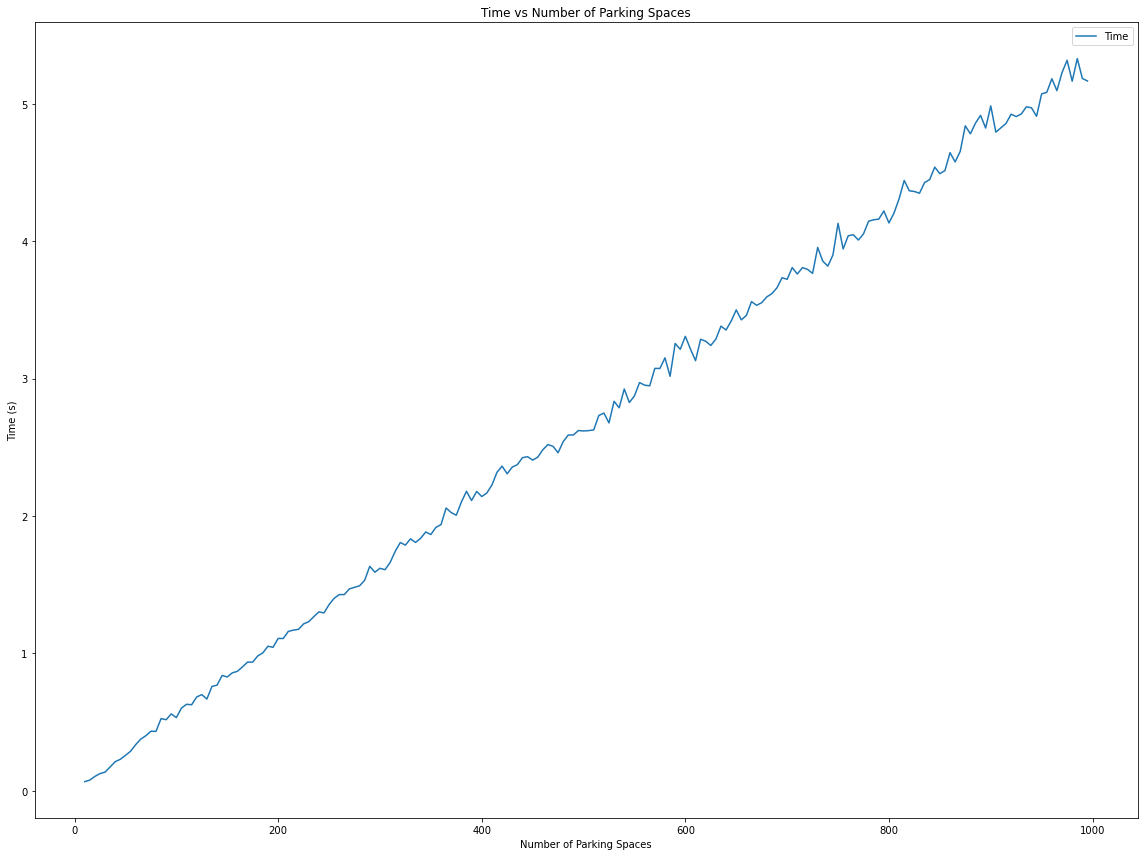

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.title('Time vs Number of Parking Spaces')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Time (s)')
plt.plot(steps, times, label='Time')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('time_vs_spaces.png', dpi=300)
plt.show()

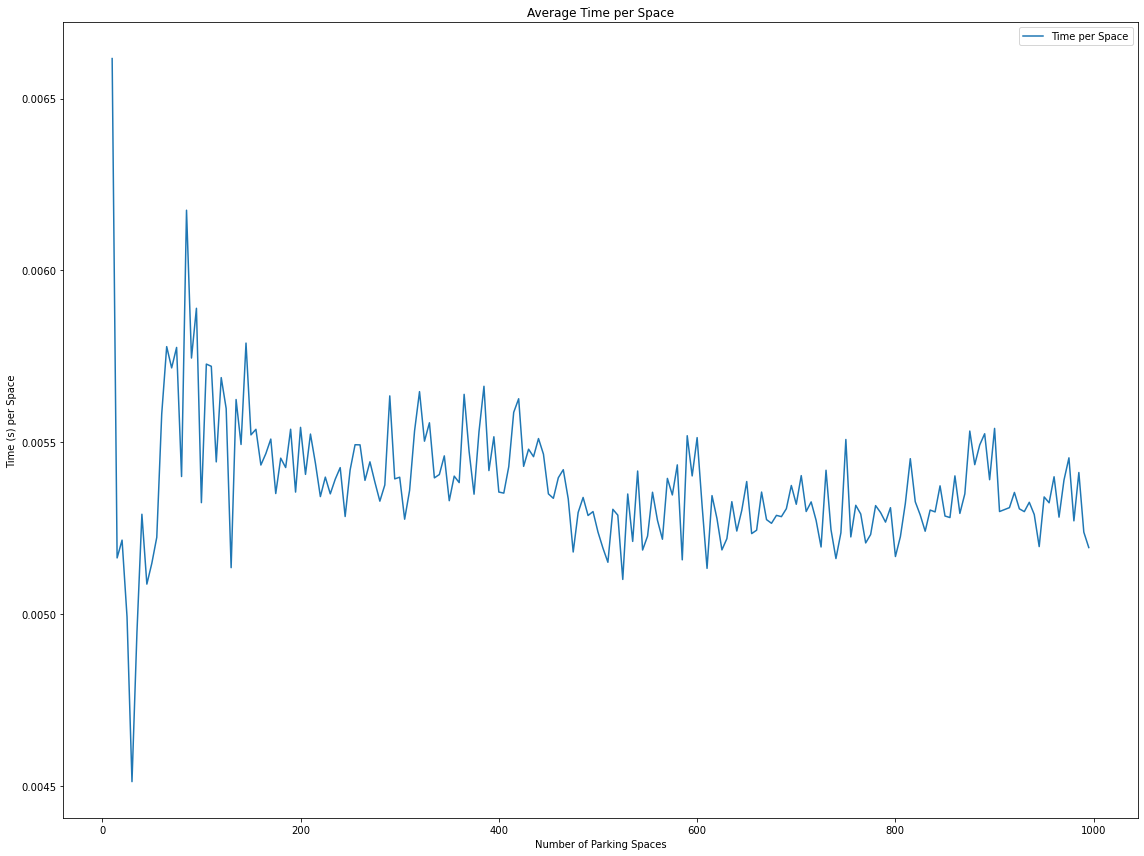

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.title('Average Time per Space')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Time (s) per Space')
plt.plot(steps, [t / s for t, s in zip(times, steps)], label='Time per Space')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('time_per_space.png', dpi=300)
plt.show()

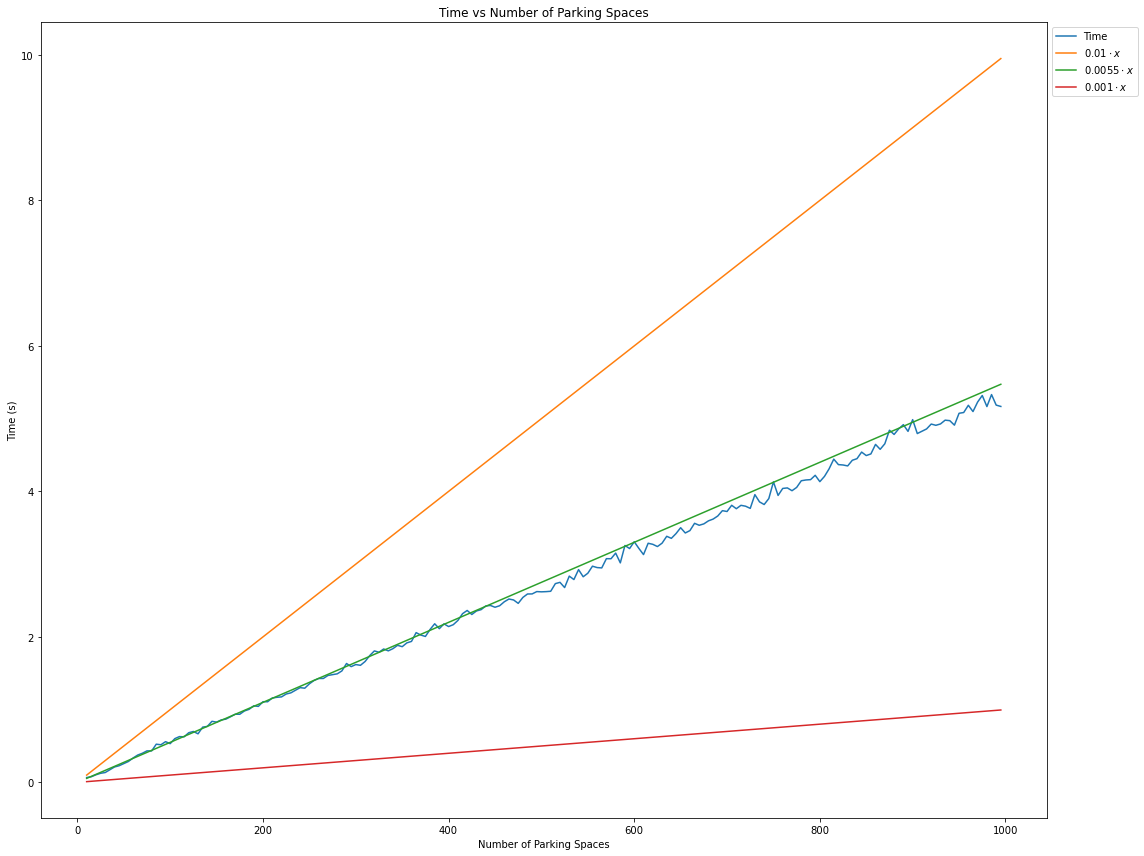

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.title('Time vs Number of Parking Spaces')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Time (s)')
plt.plot(steps, times, label='Time')
plt.plot(steps, [(x / 100) for x in steps], label='$0.01 \cdot x$')
plt.plot(steps, [(x / (1 / 0.0055)) for x in steps], label='$0.0055 \cdot x$')
plt.plot(steps, [(x / 1000) for x in steps], label='$0.001 \cdot x$')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('time_vs_spaces_with_estimates.png', dpi=300)
plt.show()

# Policy vs Value Iteration

In [33]:
num_spaces = 12
p_min = 0.1
p_max = 0.9
p_same = 0.9
t_drive = 1
t_walk = 3
t_wait = 10
r_no = 100

Q = np.zeros((num_spaces, 2, 3))
V = np.zeros((num_spaces, 2))

p = np.linspace(p_min, p_max, num_spaces)


class Action(IntEnum):
    WAIT = 0
    PARK = 1
    NEXT = 2


class Status(IntEnum):
    EMPTY = 0
    FULL = 1


def reward(state, action):
    space, status = state
    if action == Action.WAIT:
        return -t_wait
    elif action == Action.PARK:
        if status == Status.EMPTY:
            return -t_walk * (num_spaces - space - 1)
        elif status == Status.FULL:
            return -r_no
    elif action == Action.NEXT:
        if space == num_spaces - 1:
            return -r_no
        else:
            return -t_drive


def value_iteration(v, q):
    delta = 1
    threshold = 1e-6
    max_iters = 1_000
    iters = 0
    while delta > threshold and iters < max_iters:
        last_v = np.copy(v)
        for space, status, action in product(range(num_spaces), Status, Action):
            def same_status(status):
                return p_same * (reward((space, status), action) + v[space, status])

            def diff_status(old, new):
                return (1 - p_same) * (reward((space, old), action) + v[space, new])

            if status == Status.EMPTY and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.FULL)

            if status == Status.FULL and action == Action.WAIT:
                q[space, status, action] = same_status(status) + diff_status(status, Status.EMPTY)

            def terminal(status, action):
                return reward((space, status), action)

            if status == Status.EMPTY and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.PARK:
                q[space, status, action] = terminal(status, action)

            def same_next_status(status):
                return reward((space, status), action) + v[space + 1, status]

            def diff_next_status(old, new):
                return reward((space, old), action) + v[space + 1, new]

            if status == Status.EMPTY and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = (1 - p[space + 1]) * same_next_status(status) + p[space + 1] * diff_next_status(status, Status.FULL)
                else:
                    q[space, status, action] = terminal(status, action)

            if status == Status.FULL and action == Action.NEXT:
                if space != num_spaces - 1:
                    q[space, status, action] = p[space + 1] * same_next_status(status) + (1 - p[space + 1]) * diff_next_status(status, Status.EMPTY)
                else:
                    q[space, status, action] = terminal(status, action)

        v = np.max(q, axis=-1)

        delta = np.max(np.abs(v - last_v))
        iters += 1
    print(iters)

    return v, q


new_v, new_q = value_iteration(V, Q)


def policy(q):
    return np.argmax(q, axis=-1)

154


In [35]:
spaces = 12
q = np.zeros((spaces, 2, 3))
v = np.zeros((spaces, 2))
policy = np.random.randint(0, 2 + 1, (spaces, 2))
policies = [policy]
iterations = [0]
p = np.linspace(p_min, p_max, spaces)


def policy_evaluation(v, policy):
    delta = 1
    threshold = 1e-6
    max_iters = 1000
    iters = 0
    while delta > threshold and iters < max_iters:
        last_v = np.copy(v)
        for space, status in product(range(num_spaces), Status):
            action = Action(policy[space, status])
            def same_status(status):
                return p_same * (reward((space, status), action) + last_v[space, status])

            def diff_status(old, new):
                return (1 - p_same) * (reward((space, old), action) + last_v[space, new])

            if status == Status.EMPTY and action == Action.WAIT:
                v[space, status] = same_status(status) + diff_status(status, Status.FULL)

            if status == Status.FULL and action == Action.WAIT:
                v[space, status] = same_status(status) + diff_status(status, Status.EMPTY)

            def terminal(status, action):
                return reward((space, status), action)

            if status == Status.EMPTY and action == Action.PARK:
                v[space, status] = terminal(status, action)

            if status == Status.FULL and action == Action.PARK:
                v[space, status] = terminal(status, action)

            def same_next_status(status):
                return reward((space, status), action) + last_v[space + 1, status]

            def diff_next_status(old, new):
                return reward((space, old), action) + last_v[space + 1, new]

            if status == Status.EMPTY and action == Action.NEXT:
                if space != num_spaces - 1:
                    v[space, status] = (1 - p[space + 1]) * same_next_status(status) + p[space + 1] * diff_next_status(status, Status.FULL)
                else:
                    v[space, status] = terminal(status, action)

            if status == Status.FULL and action == Action.NEXT:
                if space != num_spaces - 1:
                    v[space, status] = p[space + 1] * same_next_status(status) + (1 - p[space + 1]) * diff_next_status(status, Status.EMPTY)
                else:
                    v[space, status] = terminal(status, action)

        delta = np.max(np.abs(v - last_v))
        iters += 1

    iterations.append(iters)
    return v


def policy_improvement(v, policy):
    policy_stable = True
    new_policy = np.zeros_like(policy)
    for space, status in product(range(num_spaces), Status):
        old_action = Action(policy[space, status])
        q = np.zeros(3)

        def same_status(status):
            return p_same * (reward((space, status), Action.WAIT) + v[space, status])

        def diff_status(old, new):
            return (1 - p_same) * (reward((space, old), Action.WAIT) + v[space, new])

        if status == Status.EMPTY:
            q[Action.WAIT] = same_status(status) + diff_status(status, Status.FULL)

        if status == Status.FULL:
            q[Action.WAIT] = same_status(status) + diff_status(status, Status.EMPTY)

        def terminal(status, action):
            return reward((space, status), action)

        if status == Status.EMPTY:
            q[Action.PARK] = terminal(status, Action.PARK)

        if status == Status.FULL:
            q[Action.PARK] = terminal(status, Action.PARK)

        def same_next_status(status):
            return reward((space, status), Action.NEXT) + v[space + 1, status]

        def diff_next_status(old, new):
            return reward((space, old), Action.NEXT) + v[space + 1, new]

        if status == Status.EMPTY:
            if space != num_spaces - 1:
                q[Action.NEXT] = (1 - p[space + 1]) * same_next_status(status) + p[space + 1] * diff_next_status(status, Status.FULL)
            else:
                q[Action.NEXT] = terminal(status, Action.NEXT)

        if status == Status.FULL:
            if space != num_spaces - 1:
                q[Action.NEXT] = p[space + 1] * same_next_status(status) + (1 - p[space + 1]) * diff_next_status(status, Status.EMPTY)
            else:
                q[Action.NEXT] = terminal(status, Action.NEXT)

        new_action = Action(np.argmax(q))
        new_policy[space, status] = new_action
        if old_action != new_action:
            policy_stable = False

    policies.append(new_policy)

    return policy_stable, new_policy


while True:
    v = policy_evaluation(v, policy)
    policy_stable, policy = policy_improvement(v, policy)
    if policy_stable:
        break

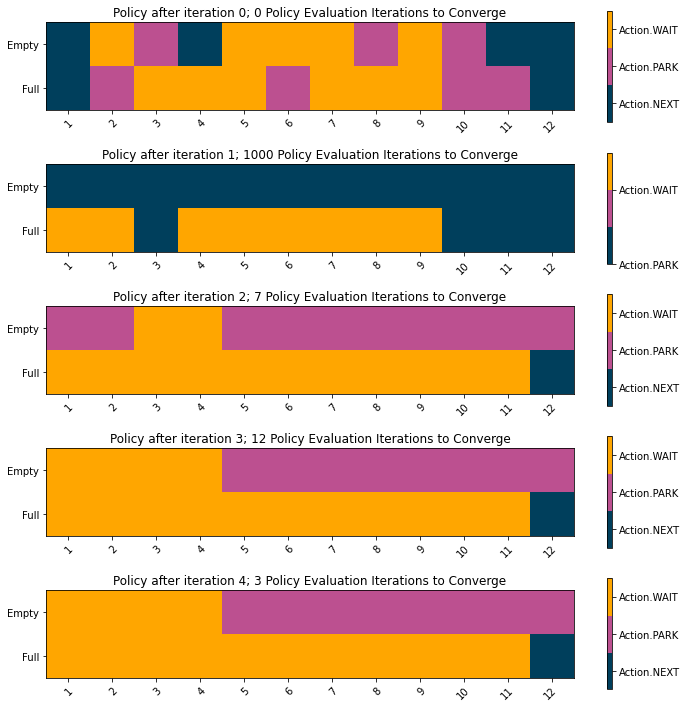

In [36]:
from matplotlib.colors import LinearSegmentedColormap
myColors = ('#003f5c', '#bc5090', '#ffa600')
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, axes = plt.subplots(len(policies), figsize=(10, 10))
for i, p in enumerate(policies):
    row_labels = ["Empty", "Full"]
    col_labels = [str(s) for s in range(1, num_spaces+1)]

    im = axes[i].imshow(p.transpose(), cmap=cmap)
    cbar = axes[i].figure.colorbar(im, ax=axes[i])
    cbar.set_ticks([1.667, 1, 0.3333])
    cbar.set_ticklabels([Action(i) for i in range(3)])

    # We want to show all ticks...
    axes[i].set_xticks(np.arange(len(col_labels)))
    axes[i].set_yticks(np.arange(len(row_labels)))
    # ... and label them with the respective list entries
    axes[i].set_xticklabels(col_labels)
    axes[i].set_yticklabels(row_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    axes[i].set_title(f"Policy after iteration {i}; {iterations[i]} Policy Evaluation Iterations to Converge")

fig.tight_layout()
plt.savefig('policy_iteration_policies_2.png', dpi=300)
plt.show()